In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('data/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [4]:
# Use covariance to calculate the association
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [5]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


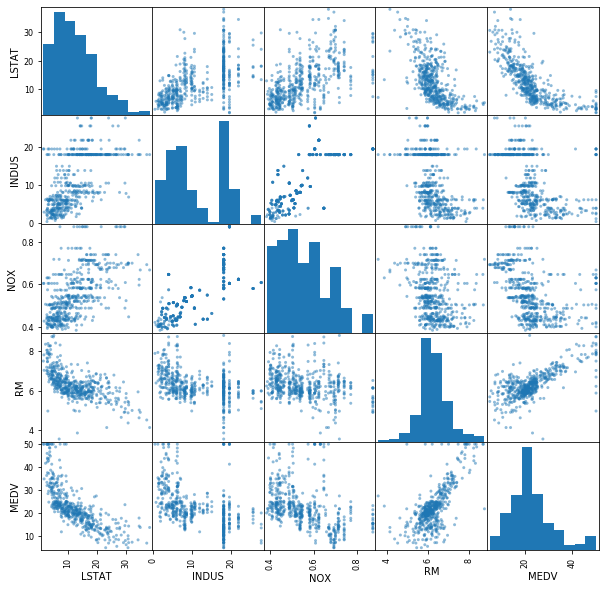

In [3]:
# scatter matrix plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10))

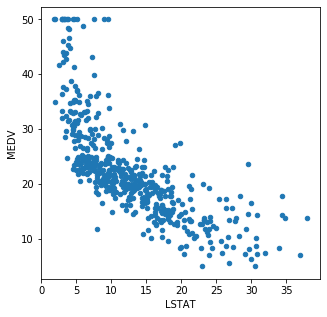

In [4]:
# This time we take a closer look at MEDV vs LSTAT。 What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(5, 5))

## Simple Linear Regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

#### We shall base on the association between LSTAT and MEDV and create a simple linear regression model. 

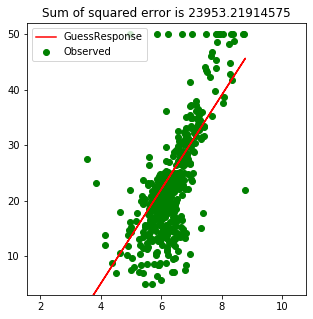

In [6]:
# Try to assign the value of b0, b1 (intercept and slope) to get a straight line that can describe our data 
b0 = -29
b1 = 8.5
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']

# plot your estimated line together with the points
plt.figure(figsize=(5, 5))
plt.title('Sum of squared error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

## Least Square Stimation

##### We need to find the 'Best Fit Line' that minimize the sum of squared errors

In [7]:
import statsmodels.formula.api as smf
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()

In [8]:
b0_ols = model.params[0]
b1_ols = model.params[1]
print(b0_ols,b1_ols)

-34.670620776438575 9.102108981180312


The estimated intercept is -34.670620776438575, and the estimated slope is 9.102108981180312


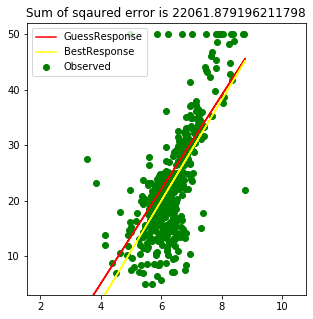

In [9]:
import statsmodels.formula.api as smf
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]
print('The estimated intercept is {}, and the estimated slope is {}'.format(b0_ols,b1_ols))
housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Also want to know the error of of guess...
housing['error'] = housing['MEDV'] - housing['BestResponse']

# plot your estimated line together with the points
plt.figure(figsize=(5, 5))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

## Check assumptions of simple linear regression models

### 1. Linearity

* The mean of $y$ is lineally determined by predictors

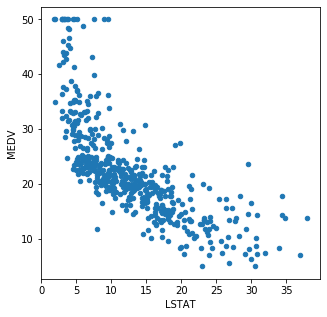

In [12]:
# This time we take a closer look at MEDV vs LSTAT。 What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(5, 5))

### 2. Independence

We have two ways to check independence condition
* With different $x_i$ responses are independent
* With the Durbin Watson test
    * Positive correlated 1.5 < Normal < 2.5 Negative correlated

In [13]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

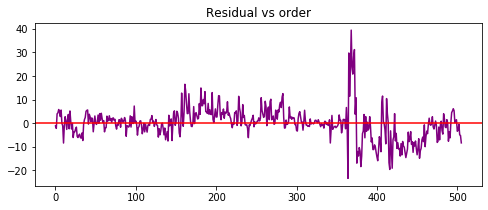

In [14]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(8, 3))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

#### Summary table

In [15]:
# Method 2: Durbin Watson Test
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           2.49e-74
Time:                        23:47:32   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Normality

* Random noise and $y$ follow normal distributions

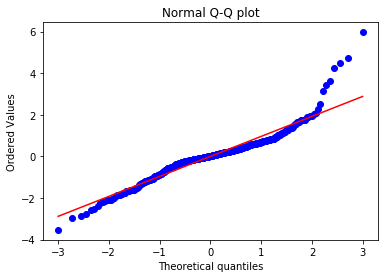

In [16]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)
stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

## 4. Equal Variance

* The variance $y$ are all equal even if predictors are different

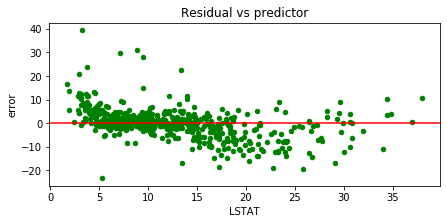

In [17]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(7, 3), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

### Final conclutions of the model
* R-squared: About 48.4% of variation of MEDV can be explained by the model
* R-squared < 50% implies that there's a big portion that is explained by other variables
* i.e. we need a multiple linear regression
* P value (P>|t|) equal 0.000 < 0.05 means that we have to reject null hypotesis (Reject: $H_0 : \beta_1 = 0$)
* Linearity condition violated
* Durbin Watson < 1.5 i.e. independence condition violated
* If errors follows normal distribution they will fall on the 45º line, so Normallity condition is violated
* If variance of noise is equal for different variance predictors should not have pattern, so the condition is violated
##### We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.